# GOAL

understand data type and how to encode

# Data type

<li>Binary data : A binary variable a variable that has only 2 values..ie 0/1
<li>Categorical data : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
<li>Ordinal data : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
<li>Nominal data : Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
<li>Timeseries (cyclical) data : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.

# Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load data and get Preliminary Information

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


In [4]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
df_train.info() #get col and int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


In [39]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [40]:
summary = resumetable(df_train)

Dataset Shape: (300000, 25)


In [41]:
summary

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,300000,0,1,2,18.19
1,bin_0,int64,0,2,0,0,0,0.55
2,bin_1,int64,0,2,0,1,0,0.82
3,bin_2,int64,0,2,0,0,0,0.96
4,bin_3,object,0,2,T,T,F,1.00
5,bin_4,object,0,2,Y,Y,Y,0.94
6,nom_0,object,0,3,Green,Green,Blue,1.55
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid,2.45
8,nom_2,object,0,6,Snake,Hamster,Lion,2.44
9,nom_3,object,0,6,Finland,Russia,Russia,2.45


# Defining the train and target

In [6]:
X=df_train.drop(['target'],axis=1)
y=df_train['target']
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

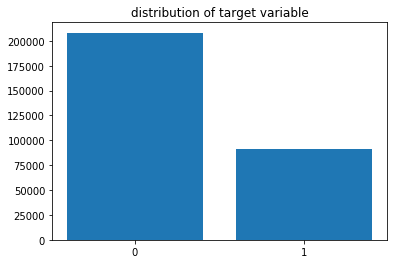

In [7]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1]) #gca = get current axes
plt.title('distribution of target variable')
plt.show()

# Method 1: Label Encoding

we change every categorical data to a number

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
%%time

train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]
        
train.head(3) 
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

CPU times: user 1.21 s, sys: 3.09 ms, total: 1.21 s
Wall time: 1.21 s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2


# Method 2 : One hot encoding

takes each category value and turns it into a binary vector of size |i|(number of values in category i) 

<h5>approach 1: OneHotEncoder() method available in sklearn</h5>

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
%%time 

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316463 columns
CPU times: user 1.95 s, sys: 52.2 ms, total: 2 s
Wall time: 2.02 s


In [33]:
train[:,0]

<300000x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

<h5>approach 2: get_dummies() function in pandas</h5>

get_dummies() method will only convert string columns and leave all other columns unchanged. If you want to use this method, you have to ensure that the categorical data are all string. Otherwise it will not perform encoding.

In [14]:
train=pd.get_dummies(X).astype(np.int8)
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 16440 columns


# Method 3 : Feature hashing

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions

In [16]:
from sklearn.feature_extraction import FeatureHasher

In [17]:
%%time

X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X_train_hash.values)

CPU times: user 4.87 s, sys: 157 ms, total: 5.03 s
Wall time: 5.06 s


In [18]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 1048576 columns


# Method 4 :Encoding categories with dataset statistics 

Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. 

In [19]:
%%time

X_train_stat=X.copy()
for c in X_train_stat.columns:
    if(X_train_stat[c].dtype=='object'):
        X_train_stat[c]=X_train_stat[c].astype('category')
        counts=X_train_stat[c].value_counts()
        counts=counts.sort_index()
        counts=counts.fillna(0)
        counts += np.random.rand(len(counts))/1000
        X_train_stat[c].cat.categories=counts

CPU times: user 502 ms, sys: 116 ms, total: 618 ms
Wall time: 726 ms


In [20]:
X_train_stat.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,153535.000121,191633.000068,127341.000838,29855.000417,45979.000709,36942.000232,...,271.000674,19.000487,2,77428.000697,33768.000066,24740.000439,3974.000710,506.000627,2,2
1,1,0,1,0,153535.000121,191633.000068,127341.000838,101181.000338,29487.000856,101123.000254,...,111.000252,13.000202,1,77428.000697,22227.000075,35276.000065,18258.000424,2603.000676,7,8
2,2,0,0,0,146465.000722,191633.000068,96166.000798,101181.000338,101295.000080,101123.000254,...,278.000599,29.000426,1,25065.000987,63908.000498,24740.000439,16927.000233,2572.000440,7,2


# Method 5 : Target encoding

 we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). 
 The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

In [21]:
%%time

X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values

CPU times: user 3min 26s, sys: 1.55 s, total: 3min 28s
Wall time: 3min 28s


In [22]:
X_target.head(4)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,...,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,...,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,...,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,...,0.227273,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1


<h5>K-Fold target encoding </h5>

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

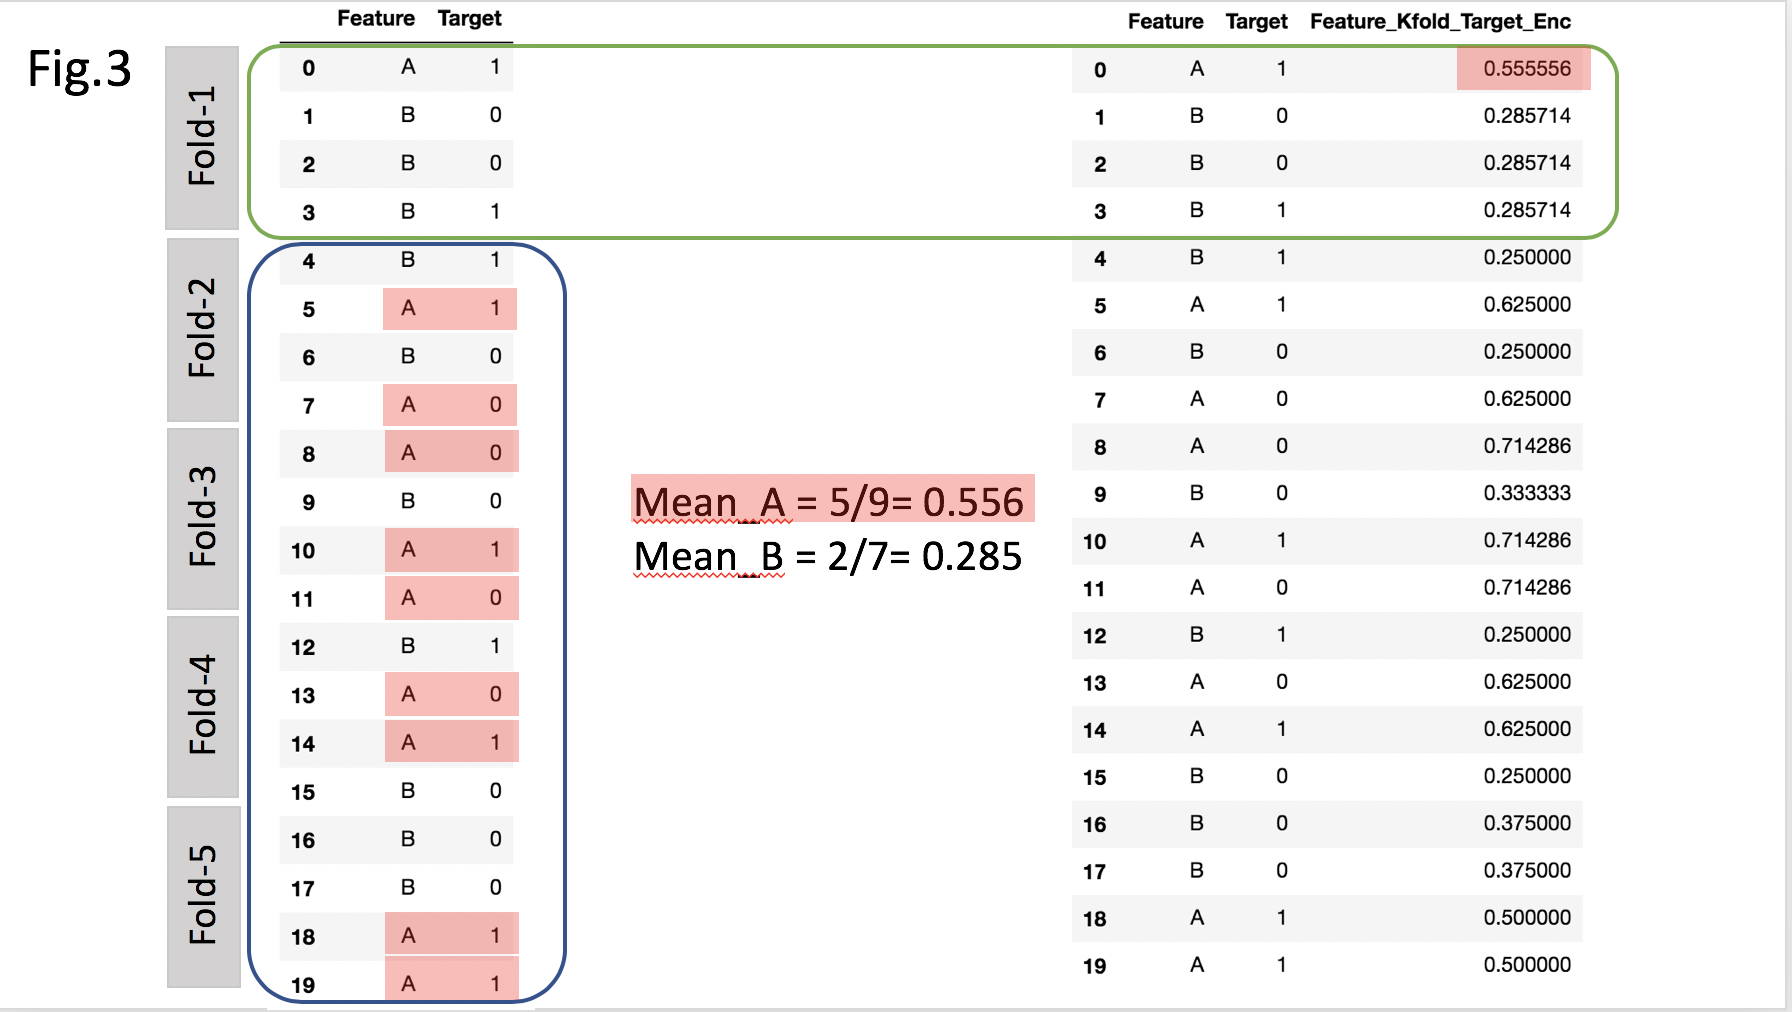

In [25]:
from sklearn.model_selection import KFold

In [23]:
X['target']=y
cols=X.drop(['target','id'],axis=1).columns

In [26]:
X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = False, random_state=2019)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'target']].groupby(col)['target'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values

In [27]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.327356,0.360281,0.305929,0.24171,...,0.5,0.334926,0.403542,0.259103,0.307031,0.211418,0.412888,0.323473,0.244538,0
1,1,0,1,0,1,1,0.327356,0.290501,0.358107,0.289501,...,0.125,0.278366,0.403542,0.327796,0.208194,0.185704,0.293144,0.341711,0.327219,0
2,2,0,0,0,0,1,0.242135,0.290501,0.293881,0.289501,...,0.166667,0.278366,0.316665,0.402135,0.307031,0.354919,0.208748,0.341711,0.244538,0
3,3,0,1,0,0,1,0.350536,0.290501,0.305929,0.340791,...,0.233333,0.278366,0.403542,0.361036,0.330519,0.211418,0.358066,0.323473,0.255791,1
4,4,0,0,0,0,0,0.350536,0.290501,0.293881,0.340791,...,0.137931,0.278366,0.403542,0.225265,0.208194,0.354919,0.410066,0.341711,0.327219,0


# Encoding cyclic features

In [28]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

CPU times: user 218 ms, sys: 16.2 ms, total: 234 ms
Wall time: 233 ms


,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


In [34]:
one=OneHotEncoder()

one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316480 columns
